In [1]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

import matplotlib.pyplot as plt
import numpy as np

train_datagen = ImageDataGenerator(horizontal_flip = True,
                                   vertical_flip = True,
                                   shear_range = 0.5,
                                   brightness_range = [0.5, 1.5],
                                   zoom_range = 0.2,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 30,
                                   fill_mode = 'nearest')

In [4]:
from google.colab import files
uploaded=files.upload()

Saving snoopy.png to snoopy.png


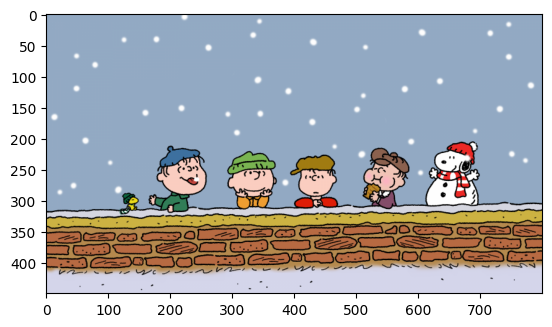

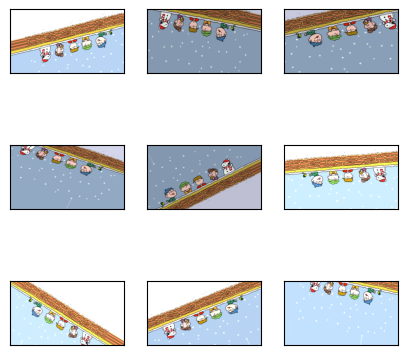

In [5]:
snoopy = img_to_array(load_img('./snoopy.png')).astype(np.uint8)
plt.figure()
plt.imshow(snoopy)

snoopy = snoopy.reshape((1, ) + snoopy.shape)
train_generator = train_datagen.flow(snoopy, batch_size = 1)

plt.figure(figsize = (5, 5))
for i in range(9):
  data = next(train_generator)
  image = data[0]
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(np.array(image, dtype = np.uint8), cmap = 'gray')
plt.show()

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
# ----------------- 이미지 어그멘테이션
train_datagen = ImageDataGenerator(rescale = 1. / 255,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   shear_range = 0.5,
                                   brightness_range = [0.5, 1.5],
                                   zoom_range = 0.2,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 30,
                                   fill_mode = 'nearest')

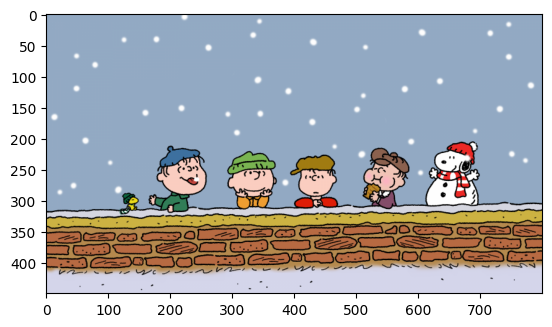

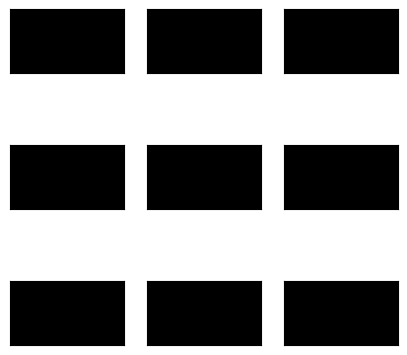

In [8]:
snoopy = img_to_array(load_img('./snoopy.png')).astype(np.uint8)
plt.figure()
plt.imshow(snoopy)

snoopy = snoopy.reshape((1, ) + snoopy.shape)
train_generator = train_datagen.flow(snoopy, batch_size = 1)

plt.figure(figsize = (5, 5))
for i in range(9):
  data = next(train_generator)
  image = data[0]
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(np.array(image, dtype = np.uint8), cmap = 'gray')
plt.show()

In [1]:
from tensorflow.keras.datasets import cifar10
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 평균과 표준 편차는 채널별로 구해줍니다.
# x_mean = np.mean(x_train, axis = (0, 1, 2))
# x_std = np.std(x_train, axis = (0, 1, 2))

# x_train = (x_train - x_mean) / x_std
# x_test = (x_test - x_mean) / x_std

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size = 0.3, random_state = 777)

# sparse_categorical_crossentropy를 사용하기 위해선 (batch_size, ) 형태를 가져야합니다.
# 따라서 np.squeeze를 사용해서 마지막 차원을 없애줍니다.
# y_train의 경우 (35000 , 1) -> (35000, )이 됩니다.
y_train = np.squeeze(y_train)
y_val = np.squeeze(y_val)

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1. / 255,
                                   horizontal_flip = True,
                                   zoom_range = 0.2,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 30,
                                   fill_mode = 'nearest')

# 검증 데이터셋에는 변환을 사용하지 않습니다.
# val_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator(rescale = 1. / 255)

batch_size = 32

train_generator = train_datagen.flow(x_train, y_train, batch_size = batch_size)
val_generator = val_datagen.flow(x_train, y_train, batch_size = batch_size)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2)) # 드롭아웃을 추가합니다.
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2)) # 드롭아웃을 추가합니다.
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2)) # 드롭아웃을 추가합니다.
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax')) # 열 개의 출력을 가지는 신경망

model.compile(optimizer = Adam(1e-4),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [5]:
history = model.fit(train_generator,
                    epochs = 30,
                    batch_size = 32,
                    validation_data = val_generator)

Epoch 1/30
1094/1094 [==============================] - 53s 41ms/step - loss: 1.8675 - acc: 0.3105 - val_loss: 1.6104 - val_acc: 0.4057
Epoch 2/30
1094/1094 [==============================] - 31s 28ms/step - loss: 1.6273 - acc: 0.4067 - val_loss: 1.4654 - val_acc: 0.4668
Epoch 3/30
1094/1094 [==============================] - 32s 30ms/step - loss: 1.5251 - acc: 0.4489 - val_loss: 1.4026 - val_acc: 0.4949
Epoch 4/30
1094/1094 [==============================] - 31s 29ms/step - loss: 1.4380 - acc: 0.4816 - val_loss: 1.4285 - val_acc: 0.4918
Epoch 5/30
1094/1094 [==============================] - 32s 30ms/step - loss: 1.3789 - acc: 0.5038 - val_loss: 1.3101 - val_acc: 0.5384
Epoch 6/30
1094/1094 [==============================] - 38s 35ms/step - loss: 1.3267 - acc: 0.5249 - val_loss: 1.2000 - val_acc: 0.5754
Epoch 7/30
1094/1094 [==============================] - 32s 29ms/step - loss: 1.2833 - acc: 0.5414 - val_loss: 1.1420 - val_acc: 0.5949
Epoch 8/30
1094/1094 [==========================

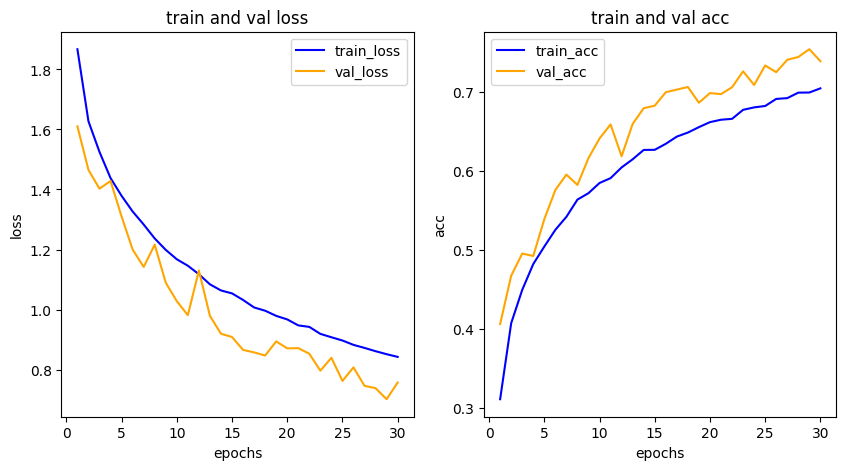

In [6]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = 3,
                 padding = 'same', input_shape = (32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, activation = 'softmax')) # 열 개의 출력을 가지는 신경망

model.compile(optimizer = Adam(1e-4),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [8]:
history = model.fit(train_generator,
                    epochs = 30,
                    batch_size = 32,
                    validation_data = val_generator)

Epoch 1/30
1094/1094 [==============================] - 42s 33ms/step - loss: 1.6183 - acc: 0.4225 - val_loss: 1.3703 - val_acc: 0.5123
Epoch 2/30
1094/1094 [==============================] - 34s 31ms/step - loss: 1.3680 - acc: 0.5133 - val_loss: 1.2957 - val_acc: 0.5439
Epoch 3/30
1094/1094 [==============================] - 35s 32ms/step - loss: 1.2525 - acc: 0.5537 - val_loss: 1.1265 - val_acc: 0.6020
Epoch 4/30
1094/1094 [==============================] - 35s 32ms/step - loss: 1.1723 - acc: 0.5887 - val_loss: 1.0469 - val_acc: 0.6334
Epoch 5/30
1094/1094 [==============================] - 34s 31ms/step - loss: 1.1068 - acc: 0.6078 - val_loss: 0.9388 - val_acc: 0.6703
Epoch 6/30
1094/1094 [==============================] - 34s 31ms/step - loss: 1.0591 - acc: 0.6257 - val_loss: 0.9641 - val_acc: 0.6625
Epoch 7/30
1094/1094 [==============================] - 38s 35ms/step - loss: 1.0108 - acc: 0.6437 - val_loss: 0.9270 - val_acc: 0.6794
Epoch 8/30
1094/1094 [==========================

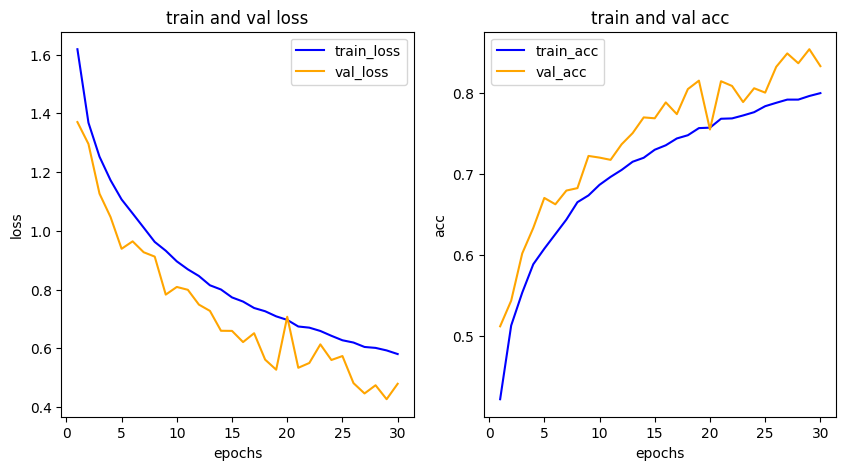

In [9]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()